# CS231n: Convolutional Neural Networks for Visual Recognition. 

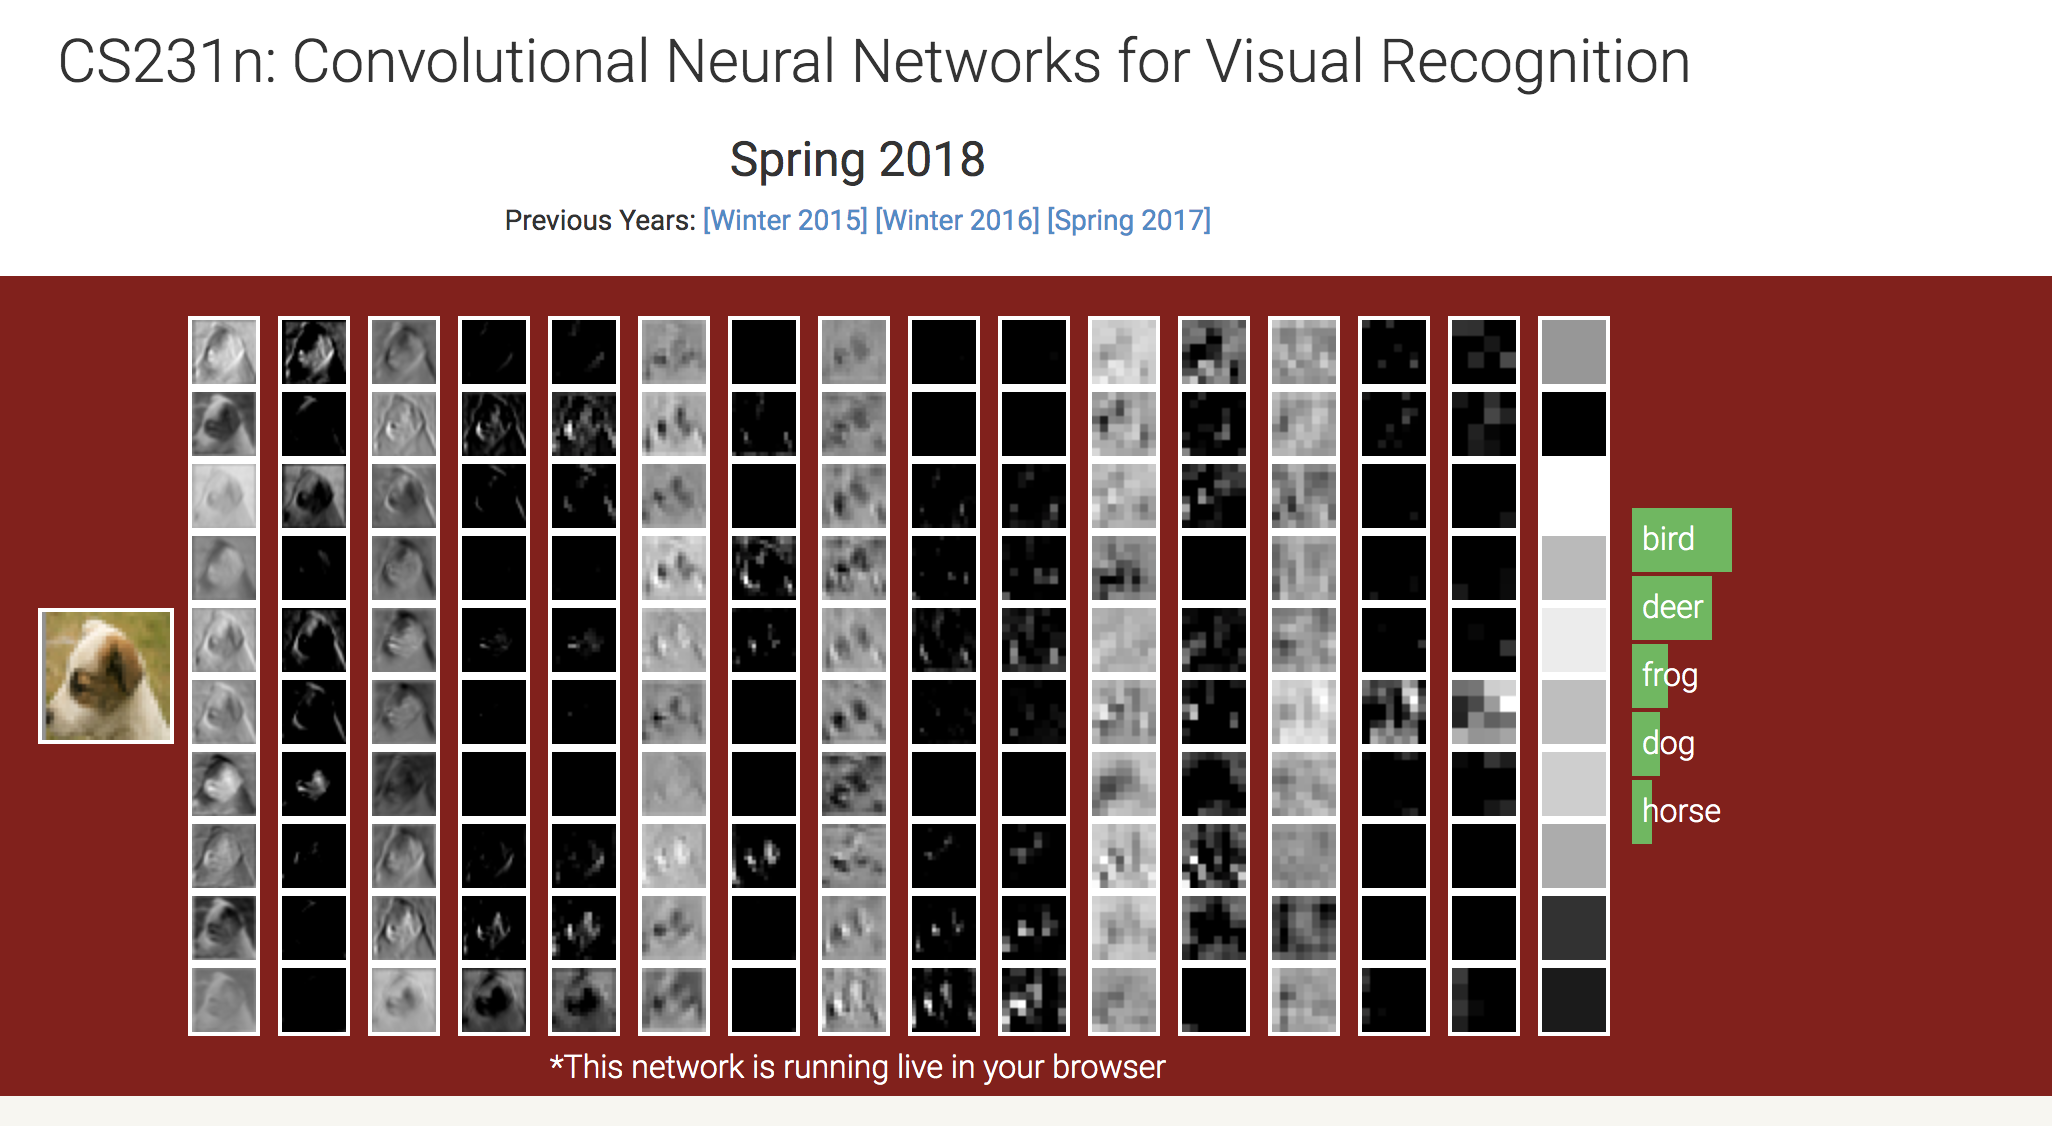

## Module 1 Neural Networks

### Module 1.1 Intro to Image Classification, data-driven approach, pipeline

<font size="5"> Image Classification </font>

**Motivation**: Image Classification problem is the task of assigning an input image one label from a fixed set of categories. This is one of the core problems in Computer Vision. 

**Example**. For example, in the image below an image classification model takes a single image and assigns probabilities to 4 labels, {cat, dog, hat, mug}. As shown in the image, keep in mind that to a computer an image is represented as one large 3-dimensional array of numbers. In this example, the cat image is 248 pixels wide, 400 pixels tall, and has three color channels Red,Green,Blue (or RGB for short). Therefore, the image consists of 248 x 400 x 3 numbers, or a total of 297,600 numbers. Each number is an integer that ranges from 0 (black) to 255 (white). Our task is to turn this quarter of a million numbers into a single label, such as “cat”.

![M1_1](http://cs231n.github.io/assets/classify.png)

**Challenges**: there existing many challenges to recognized a picture pattern as follows:
-  **Viewpoint Variation**. Camera can take pics of one same object from many differer objectives.
- **Scale Variation**. The size of one same object can be very different in different pics.
- **Deformation**(变形). Many objects are not physcially rigid and can be deformed into different shapes. 
- **Occlusion** (阻断). Object of interest could be occuluded and only a small porportion of it is visible.
- **Illumination**(照明，打光). Different illumanition perpectives or strength can be drastic (极端的; 猛烈的) on pixel level.
- **Background clutter**(凌乱，杂乱). The objects of interest may blend into their environment, making them hard to identify.
- **Intra-class(同一个类型内部) variation**(凌乱，杂乱). The object class can be very broad like chair. There are many different types of the chair and they all look different. 

A good image classification model must be invariant to the cross product of all these variations, while simultaneously retaining sensitivity to the **inter-class variations**（不同类型之间）.

![m1_2](http://cs231n.github.io/assets/challenges.jpeg)

**Data-driven approach**. We’re going to provide the computer with many examples of each class and then develop learning algorithms that look at these examples and learn about the visual appearance of each class. This approach is referred to as a *data-driven approach*, since it relies on first accumulating a *training dataset* of labeled images. 

**The image classification pipeline**. The pipeline or the steps to classify imagies are listed as follows:
- **Input**. Our input consists of a set of _N_ images, each labeled with one of _K_ different classes. We refer to this data as the *training set*.
- **Learning**. Use the training set to learn what every one of the classes looks like. We refer to this step as _training a classifier_, or _learning a model_.
- **Evaluation**. We ask the calssfier to predict the labels of new images it's never seen before. Then we compare the predicted label with the true labels. We’re hoping that a lot of the predictions match up with the true answers (which we call the _ground truth_).

<font size="5"> Nearest Neighbor Classifier </font>

This classifier has *nothing to do with Convolutional Neural Networks and it is very rarely used in practice*, but it will allow us to get an idea about the basic approach to an image classification problem.

**Example image classification dataset: CIFAR-10**. This dataset consists of 60,000 tiny images that are 32 pixels high and wide. Each image is labeled with one of **10 classes** (for example “airplane, automobile, bird, etc”). These 60,000 images are partitioned into *a training set of 50,000* images and *a test set of 10,000 images*. The web address of this dataset: http://www.cs.toronto.edu/~kriz/cifar.html. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

![m1_3](http://cs231n.github.io/assets/nn.jpg)

The nearest neighbor classifier will <font color='blue'>take a test image, compare it to every single one of the training images, and predict the label of the **closest** training image</font>. In the image above and on the right you can see an example result of such a procedure for 10 example test images. Notice that in only about 3 out of 10 examples an image of the same class is retrieved, while in the other 7 examples this is not the case

__How do compare the test pic with the trained pic? Any rule to follow?__ 

One of the simplest possibilities is to compare the images pixel by pixel and add up all the differences. In other words, given two images and representing them as vectors _I1, I2_ , a reasonable choice for comparing them might be the **<font size=3> L1 distance</font>**: 

$$d(I_{1}, I_{2})=\sum_{p}|I_{1}^{p}- I_{2}^{p}| $$

![m1_4](http://cs231n.github.io/assets/nneg.jpeg)

An example of using pixel-wise differences to compare two images with L1 distance (for one color channel in this example). Two images are subtracted elementwise and then all differences are added up to a single number. *If two images are identical the result will be zero. But if the images are very different the result will be large*.

Let’s also look at how we might implement the classifier in code.

In [1]:
import cifar10
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [2]:
class_names = cifar10.load_class_names()
print(class_names)

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
images_train, cls_train, labels_train = cifar10.load_training_data()


Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [4]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [9]:
import pickle as p
import numpy as np
import os
def load_CIFAR_batch(filename):
    """ 载入cifar数据集的一个batch """
    with open(filename, 'rb') as f:
        datadict = p.load(f, encoding='latin1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ 载入cifar全部数据 """
    xs = []
    ys = []
    for b in range(1, 6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b,))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte
#https://blog.csdn.net/sinat_35512245/article/details/78502782

In [3]:
import numpy as np
from Load_cifar10_daniel import load_CIFAR10
import matplotlib.pyplot as plt
cifar10_dir='/Users/danielma/Documents/Neural Networks CS 231N /TensorFlow-Tutorials-master/data/CIFAR-10/cifar-10-batches-py'
Xtr, Ytr, Xte, Yte = load_CIFAR10(cifar10_dir)

In [4]:
Xtr_rows = Xtr.reshape(Xtr.shape[0], 32*32*3) # Xtr_rows becomes 50000 x 3072
Xte_rows = Xte.reshape(Xte.shape[0], 32*32*3) # Xte_rows becomes 10000 x 3072

In [5]:
print(Xtr_rows.shape)
print(Xte_rows.shape)

(50000, 3072)
(10000, 3072)


In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np


import numpy as np

class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y
  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
        distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
        min_index = np.argmin(distances) # get the index with smallest distance
        Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

nn=NearestNeighbor()
nn.train(Xtr_rows, Ytr)
Yte_predict=nn.predict(Xte_rows)
print (np.mean(Yte_predict == Yte) )
#print (accuracy_score(Yte, Yte_predict))

KeyboardInterrupt: 

In [5]:
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xtr_rows, Ytr)

knn_pred = knn.predict(Xte_rows)
accuracy_score(Yte, knn_pred)

KeyboardInterrupt: 

After running this code, we will see that this classifiern only archives **38.6%** on CIFAR-10. 

**The choice of distance.** Another choice of calculating the distance  is called **L2 distance**. **L1 and L2** are also used on the concept of regularization. **L2** takes the form:

<font size=4>$$d_{2}(I_{1}, I_{2})= \sqrt{\sum_{p}(I_{1}^{p}- I_{2}^{p})^2}$$</font>

Now we can redo the *Nearest Neighbor* algorithm by only changing the distance function.

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np


import numpy as np

class NearestNeighbor(object):
  def __init__(self):
    pass

  def train(self, X, y):
    """ X is N x D where each row is an example. Y is 1-dimension of size N """
    # the nearest neighbor classifier simply remembers all the training data
    self.Xtr = X
    self.ytr = y
  def predict(self, X):
    """ X is N x D where each row is an example we wish to predict label for """
    num_test = X.shape[0]
    # lets make sure that the output type matches the input type
    Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

    # loop over all test rows
    for i in range(num_test):
      # find the nearest training image to the i'th test image
      # using the L1 distance (sum of absolute value differences)
        distances = np.sqrt(np.sum(np.square(self.Xtr - X[i,:]), axis = 1))
        min_index = np.argmin(distances) # get the index with smallest distance
        Ypred[i] = self.ytr[min_index] # predict the label of the nearest example

    return Ypred

nn=NearestNeighbor()
nn.train(Xtr_rows, Ytr)
Yte_predict=nn.predict(Xte_rows)
print (np.mean(Yte_predict == Yte) )
#print (accuracy_score(Yte, Yte_predict))

In a practical nearest neighbor application we could leave out the square root operation because square root is a *monotonic function*. That is, it scales the absolute sizes of the distances but it preserves the ordering, so the **nearest neighbors with or without it are identical**. If you ran the Nearest Neighbor classifier on CIFAR-10 with this distance, you would obtain <font size=3.5>**35.4%**</font> accuracy (slightly lower than our L1 distance result).

L1 and L2 distances (or equivalently the L1/L2 norms of the differences between a pair of images) are the most commonly used special cases of a [p-norm (1)](https://planetmath.org/vectorpnorm)/[p-norm (2)](http://mathworld.wolfram.com/VectorNorm.html).

<font size="5"> k-Nearest Neighbor Classifier </font>

The idea is very simple: instead of finding the single closest image in the training set, we will find the top __k__ closest images, and have them vote on the label of the test image. In particular, when k = 1, we recover the *Nearest Neighbor classifier*. <font color=red>Intuitively, higher values of k have a smoothing effect that makes the classifier more **resistant to outliers**</font>

___
![mp1_5](http://cs231n.github.io/assets/knn.jpeg)

Take above graph as an example, if we use **NN**, we only look for the nearest one neighbor. That is figure in the middle, where we could have a problem of overfiitting, and we even include the outliers as our target neighbors. However, if we relax the number of neigbor to __5__ using **KNN**, we will have relativelt smooth decision boundaries which could lead to better generalization on the test data. 
***

<font size=5>Validation sets for Hyperparameter tuning</font>

__We cannot use the test set for the purpose of tweaking hyperparamters.__ <font color='red'>**Dont overfit your test data**</font>. If you tune your hyperparameters on the test set, you are effectively using the test set as the training set, and therefore the performance you achieve on it will be too optimistic with respect to what you might actually observe when you deploy your model. <font color='blue'>*But if you only use the test set once at end, it remains a good proxy for measuring the __generalization__ of your classifier*</font>.

<font size=4, color='grey'>*Evaluate on the test set only a single time, at the very end*.</font>

A way to tune the hyperpamater that does not touch the test set at all is to split the training set in two: a slightlt smaller traning set, which is called __validation set__. 

For example, we use 49,000 of the training images as training and the lef 1,000 as validation set, which is a fake test set.

In [6]:
Xval_rows=Xtr_rows[:1000, :]# take first 1000 for validation
Yval=Ytr[:1000]
Xtr_rows=Xtr_rows[1000:, :]# keep last 49,000 for train
Ytr=Ytr[1000:]


# find hyperparameters that work best on the validation set
validation_accuracies=[]
for k in [1, 3, 5, 10, 20, 50, 100]:
      # use a particular value of k and evaluation on validation data
    nn=NearestNeighbor()
    nn.train(Xtr_rows, Ytr)
    
      # here we assume a modified NearestNeighbor class that can take a k as input
    Yval_predict=nn.predict(Xval_row, k=k)
    acc= np.mean(Yval_predict==Yval)
    print 'accuracy: %f' % (acc,)
    
      # keep track of what works on the validation set
    validation_accuracies.append((k, acc))

By the end of this procedure, we could plot a graph that tells us which k works the best. *we can stcik with this value and evaluate once again actual test set*.

<font size=4, color='grey'>*Split your traning set into training set and a validation set. Use validation set to tune all hyperparameters. At the end run  a single time on the test set and report performance.*</font>

**Cross validation**. This is the techniques used when the size of the traning data is <font color='red'>small</font>.
- Iterate over different validation sets and averaging the performance across these.

**In practice**. __Cross validation__ can be computationally expensive and thus people usually avoid it and instead to have a single validation split.
- Usually 50%-90% of trainning data for traning and rest for validation
- If the number pf hyperparameters is large $\Rightarrow$ bigger validation splits
- If the number of examples in the validation set is small $\Rightarrow$ cross-validation
- Typical number of folds: 3, 5, 10-folds cross-validation

***
![corss-val](http://cs231n.github.io/assets/crossval.jpeg)
<font size=2>Common data splits. A training and test set is given. The training set is split into folds (for example 5 folds here). The folds 1-4 become the training set. One fold (e.g. fold 5 here in yellow) is denoted as the Validation fold and is used to tune the hyperparameters. Cross-validation goes a step further and iterates over the choice of which fold is the validation fold, separately from 1-5. This would be referred to as 5-fold cross-validation. In the very end once the model is trained and all the best hyperparameters were determined, the model is evaluated a single time on the test data (red).</font>
***

**Aside**. The computational complexity of the Nearest Neighbor classifier is an active area of research, and several __Approximate Nearest Neighbor (ANN)__ algorithms and libraries exist that can accelerate the nearest neighbor lookup in a dataset (e.g. [FLANN](http://www.cs.ubc.ca/research/flann/)). These algorithms allow one to trade off the correctness of the nearest neighbor retrieval(检索) with its space/time complexity during retrieval, and usually rely on a pre-processing/indexing stage that involves building a kdtree, or running the k-means algorithm.

**Pro and Cons of Nearest Neighbor Classifier**

**Pros**
- Doesn't need time to train, just need to store and possibly index training data.

**Cons**
- Comnputational cost and test time. Classifying a test example requires a comparison to every single traning example.
 - In the deep nueral networks: very time expensive to train but once finished the train, very cheap to classify the test example $\Rightarrow$ in this case, NN is more desirable.
- Not a good option when data are high-dimensional (low-dimensional would recommend)
 -  Practical image is usually high-dimensional, the NN or KNN maynot be that smart to capture the precise similarities between the pictiures.
 ***
 ![knncons](http://cs231n.github.io/assets/samenorm.png)
  <font size=2>An original image (left) and three other images next to it that are all equally far away from it based on L2 pixel distance. Clearly, the pixel-wise distance does not correspond at all to perceptual or semantic similarity.</font>
  ***

Images that are nearby each other are much more a function of the **general color distribution** of the images, or the __type of background__ rather than their semantic identity. For example, a dog can be seen very near a frog since both happen to be on white background. 

<font size=5>Summary: Applying kNN in practice</font>

If you wish to apply kNN in practice (hopefully not on images, or perhaps as only a baseline) proceed as follows:

1. Preprocess your data: Normalize the features in your data (e.g. one pixel in images) to have zero mean and unit variance. We will cover this in more detail in later sections, and chose not to cover data normalization in this section because pixels in images are usually homogeneous and do not exhibit widely different distributions, alleviating the need for data normalization.
2. If your data is very high-dimensional, consider using a dimensionality reduction technique such as PCA (wiki ref, CS229ref, blog ref) or even Random Projections.
3. Split your training data randomly into train/val splits. 
 - As a rule of thumb, between 70-90% of your data usually goes to the train split. 
 - This setting depends on how many hyperparameters you have and how much of an influence you expect them to have. 
     - If there are many hyperparameters to estimate, you should err on the side of having larger validation set to estimate them effectively. 
     - If you are concerned about the size of your validation data, it is best to split the training data into folds and perform cross-validation. 
     - If you can afford the computational budget it is always safer to go with cross-validation (the more folds the better, but more expensive).
4. Train and evaluate the kNN classifier on the validation data (for all folds, if doing cross-validation) for:
 1. many choices of k (e.g. the more the better) 
 2. across different distance types (L1 and L2 are good candidates)
5. If your kNN classifier is running too long, consider using an Approximate Nearest Neighbor library (e.g. [FLANN](http://www.cs.ubc.ca/research/flann/)) to accelerate the retrieval (at cost of some accuracy).
6. Take note of the hyperparameters that gave the best results. There is a question of whether you should use the full training set with the best hyperparameters, since the optimal hyperparameters might change if you were to fold the validation data into your training set (since the size of the data would be larger). 
 - <font color='blue'>_In practice it is cleaner to not use the validation data in the final classifier and consider it to be burned on estimating the hyperparameters_</font>. 
 - <font color='blue'>*Evaluate the best model on the __test set__. Report the test set accuracy and declare the result to be the performance of the kNN classifier on your data*</font>.